
# **Importing libraries**

In [132]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Read the dataset**

In [133]:
car_data=pd.read_csv('car_age_price.csv')
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# **EDA**

In [134]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [135]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [136]:
car_data.shape

(112, 2)

In [137]:
car_data.isna().sum()

Year     0
Price    0
dtype: int64

In [138]:
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Relationship is ploted on the basis of correlation

<AxesSubplot:>

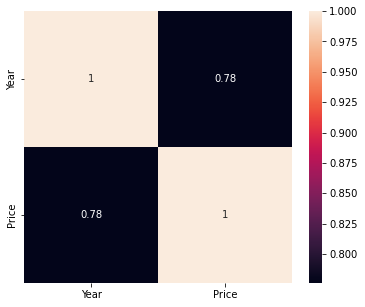

In [139]:
c=car_data.corr()
plt.subplots(figsize=(6,5))
sns.heatmap(c,annot=True)

# **Target and independent variable**

In [140]:
y=car_data['Price']
x=car_data.drop(['Price'],axis=1)

In [141]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [142]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

# **Training and testing data**

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)



# **Linear regression**

In [144]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [145]:
model=lr.fit(x_train,y_train)

In [146]:
y_pred=model.predict(x_test)
            


In [147]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ' ,r2_score(y_test,y_pred))

MSE is :  4326906256.829671
R2 is :  0.36759313425902185


# **Lasso regression**

In [150]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [154]:
y_pred_lasso=lasso.predict(x_test)

In [155]:
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)


In [156]:
print('MSE is : ',mse_lasso)
print('R2 is : ',r2_lasso)

MSE is :  4326905791.966492
R2 is :  0.3675932022019466


# Prediction of price in 2022 using lasso regression and linear regression 

In [157]:
year=2022
price_pred_lr=lr.predict([[year]])
print('predicted price (linear regression):',price_pred_lr[0])

predicted price (linear regression): 743601.6159450412


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [159]:
year=2022
price_pred_lasso=lasso.predict([[year]])
print('predicted price (lasso regression):',price_pred_lr[0])

predicted price (lasso regression): 743601.6159450412


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


# **Performance**

In [168]:
r_squared_2=0.3675932022019466
r_squared_1 =0.36759313425902185
if r_squared_1> r_squared_2:
  print("Linear Regression is performing with an R-squared value of:",r_squared_1)
else:
  print("Lasso Regression is performing with an R-squared value of:",r_squared_2)

Lasso Regression is performing with an R-squared value of: 0.3675932022019466
